In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('cancer patient data sets.csv')

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
print(df.shape)

(1000, 26)


In [5]:
df.drop('index', axis=1, inplace=True)

In [6]:
df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of     Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1   33       1              2            4             5   
1          P10   17       1              3            1             5   
2         P100   35       1              4            5             6   
3        P1000   37       1              7            7             7   
4         P101   46       1              6            8             7   
..         ...  ...     ...            ...          ...           ...   
995       P995   44       1              6            7             7   
996       P996   37       2              6            8             7   
997       P997   25       2              4            5             6   
998       P998   18       2              6            8             7   
999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0          

In [8]:
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [9]:
import pandas as pd
print(df.dtypes)
numerical_columns = df.select_dtypes(include=['int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object
Numerical Columns: Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
print(df.head())

   Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           0   33       1              2            4             5   
1           1   17       1              3            1             5   
2           2   35       1              4            5             6   
3           3   37       1              7            7             7   
4           4   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4       

In [11]:
import pandas as pd
import numpy as np
numerical_columns = df.select_dtypes(include=['int64']).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
for col in numerical_columns:
    df[col] = np.where((df[col] < lower_threshold[col]) | (df[col] > upper_threshold[col]), 
                       np.where(df[col] < lower_threshold[col], lower_threshold[col], upper_threshold[col]),
                       df[col])
print(df)

     Patient Id   Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0             0  33.0     1.0            2.0          4.0           5.0   
1             1  17.0     1.0            3.0          1.0           5.0   
2             2  35.0     1.0            4.0          5.0           6.0   
3             3  37.0     1.0            7.0          7.0           7.0   
4             4  46.0     1.0            6.0          8.0           7.0   
..          ...   ...     ...            ...          ...           ...   
995         995  44.0     1.0            6.0          7.0           7.0   
996         996  37.0     2.0            6.0          8.0           7.0   
997         997  25.0     2.0            4.0          5.0           6.0   
998         998  18.0     2.0            6.0          8.0           7.0   
999         999  47.0     1.0            6.0          5.0           6.0   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                  

In [12]:
print(df.shape)

(1000, 25)


In [13]:
features = ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 
            'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 
            'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 
            'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']
target = 'Level'
X = df[features]
y = df[target]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 23)
X_test shape: (200, 23)
y_train shape: (800,)
y_test shape: (200,)


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='weighted') * 100
recall = recall_score(y_test, y_pred, average='weighted') * 100
f1 = f1_score(y_test, y_pred, average='weighted') * 100
print(f"Accuracy: {accuracy:.1f}%")
print(f"Precision: {precision:.1f}%")
print(f"Recall: {recall:.1f}%")
print(f"F1 Score: {f1:.1f}%")

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1 Score: 100.0%


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


In [16]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean() * 100:.1f}%")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 100.0%


In [17]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                     Feature  Importance
13         Coughing of Blood    0.112728
11            Passive Smoker    0.099777
9                    Obesity    0.085630
17                  Wheezing    0.075292
14                   Fatigue    0.065887
12                Chest Pain    0.047938
8              Balanced Diet    0.043398
19  Clubbing of Finger Nails    0.043121
16       Shortness of Breath    0.043086
3                Alcohol use    0.040272
18     Swallowing Difficulty    0.038915
10                   Smoking    0.038630
2              Air Pollution    0.038229
6               Genetic Risk    0.037786
4               Dust Allergy    0.036367
22                   Snoring    0.032401
5       OccuPational Hazards    0.032379
15               Weight Loss    0.029377
20             Frequent Cold    0.021475
7       chronic Lung Disease    0.017274
21                 Dry Cough    0.014570
0                        Age    0.005093
1                     Gender    0.000377


In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nn_model = Sequential()
nn_model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(units=64, activation='relu'))
nn_model.add(Dense(units=1, activation='sigmoid'))
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
y_pred_nn_prob = nn_model.predict(X_test)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary labels
accuracy_nn = accuracy_score(y_test, y_pred_nn) * 100
precision_nn = precision_score(y_test, y_pred_nn, average='weighted', zero_division=1) * 100
recall_nn = recall_score(y_test, y_pred_nn, average='weighted', zero_division=1) * 100
f1_nn = f1_score(y_test, y_pred_nn, average='weighted', zero_division=1) * 100
print(f"Neural Network Model:")
print(f"Accuracy: {accuracy_nn:.1f}%")
print(f"Precision: {precision_nn:.1f}%")
print(f"Recall: {recall_nn:.1f}%")
print(f"F1 Score: {f1_nn:.1f}%")

Epoch 1/10
25/25 [==============================] - 4s 25ms/step - loss: 0.4355 - accuracy: 0.3000 - val_loss: -1.2858 - val_accuracy: 0.3200
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: -2.3333 - accuracy: 0.3663 - val_loss: -4.4760 - val_accuracy: 0.4800
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: -5.7636 - accuracy: 0.3900 - val_loss: -10.2146 - val_accuracy: 0.4700
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: -13.2618 - accuracy: 0.4525 - val_loss: -19.0042 - val_accuracy: 0.3350
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: -25.8447 - accuracy: 0.4013 - val_loss: -41.7136 - val_accuracy: 0.4700
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: -50.9586 - accuracy: 0.4325 - val_loss: -75.8776 - val_accuracy: 0.4300
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: -91.4909 - accuracy: 0.4200 - val_loss: -129.6709 - val_accuracy: 0.4

In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=1) * 100
recall_lr = recall_score(y_test, y_pred_lr, average='weighted', zero_division=1) * 100
f1_lr = f1_score(y_test, y_pred_lr, average='weighted', zero_division=1) * 100
print(f"Logistic Regression Model:")
print(f"Accuracy: {accuracy_lr:.1f}%")
print(f"Precision: {precision_lr:.1f}%")
print(f"Recall: {recall_lr:.1f}%")
print(f"F1 Score: {f1_lr:.1f}%")

Logistic Regression Model:
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1 Score: 100.0%


In [20]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100
precision_nb = precision_score(y_test, y_pred_nb, average='weighted') * 100
recall_nb = recall_score(y_test, y_pred_nb, average='weighted') * 100
f1_nb = f1_score(y_test, y_pred_nb, average='weighted') * 100
print(f"Multinomial Naive Bayes Model:")
print(f"Accuracy: {accuracy_nb:.1f}%")
print(f"Precision: {precision_nb:.1f}%")
print(f"Recall: {recall_nb:.1f}%")
print(f"F1 Score: {f1_nb:.1f}%")

Multinomial Naive Bayes Model:
Accuracy: 79.5%
Precision: 78.9%
Recall: 79.5%
F1 Score: 78.9%


In [21]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100
precision_nb = precision_score(y_test, y_pred_nb, average='weighted') * 100
recall_nb = recall_score(y_test, y_pred_nb, average='weighted') * 100
f1_nb = f1_score(y_test, y_pred_nb, average='weighted') * 100
print(f"Gaussian Naive Bayes Model:")
print(f"Accuracy: {accuracy_nb:.1f}%")
print(f"Precision: {precision_nb:.1f}%")
print(f"Recall: {recall_nb:.1f}%")
print(f"F1 Score: {f1_nb:.1f}%")

Gaussian Naive Bayes Model:
Accuracy: 89.5%
Precision: 90.0%
Recall: 89.5%
F1 Score: 89.5%


In [22]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
precision_knn = precision_score(y_test, y_pred_knn, average='weighted') * 100
recall_knn = recall_score(y_test, y_pred_knn, average='weighted') * 100
f1_knn = f1_score(y_test, y_pred_knn, average='weighted') * 100
print(f"KNN Classifier Model:")
print(f"Accuracy: {accuracy_knn:.1f}%")
print(f"Precision: {precision_knn:.1f}%")
print(f"Recall: {recall_knn:.1f}%")
print(f"F1 Score: {f1_knn:.1f}%")

KNN Classifier Model:
Accuracy: 99.5%
Precision: 99.5%
Recall: 99.5%
F1 Score: 99.5%


In [23]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1) * 100
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=1) * 100
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=1) * 100
print(f"XGBoost Classifier:")
print(f"Accuracy: {accuracy_xgb:.1f}%")
print(f"Precision: {precision_xgb:.1f}%")
print(f"Recall: {recall_xgb:.1f}%")
print(f"F1 Score: {f1_xgb:.1f}%")

XGBoost Classifier:
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1 Score: 100.0%


In [24]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
precision_svm = precision_score(y_test, y_pred_svm, average='weighted') * 100
recall_svm = recall_score(y_test, y_pred_svm, average='weighted') * 100
f1_svm = f1_score(y_test, y_pred_svm, average='weighted') * 100
print(f"SVM Model:")
print(f"Accuracy: {accuracy_svm:.1f}%")
print(f"Precision: {precision_svm:.1f}%")
print(f"Recall: {recall_svm:.1f}%")
print(f"F1 Score: {f1_svm:.1f}%")

SVM Model:
Accuracy: 96.5%
Precision: 96.7%
Recall: 96.5%
F1 Score: 96.5%


In [25]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
catboost_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass', eval_metric='Accuracy', random_state=42)
catboost_model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test), early_stopping_rounds=50, verbose=False)
y_pred_catboost = catboost_model.predict(X_test_scaled)
accuracy_catboost = accuracy_score(y_test, y_pred_catboost) * 100
precision_catboost = precision_score(y_test, y_pred_catboost, average='weighted', zero_division=1) * 100
recall_catboost = recall_score(y_test, y_pred_catboost, average='weighted', zero_division=1) * 100
f1_catboost = f1_score(y_test, y_pred_catboost, average='weighted', zero_division=1) * 100
print(f"CatBoost Classifier:")
print(f"Accuracy: {accuracy_catboost:.1f}%")
print(f"Precision: {precision_catboost:.1f}%")
print(f"Recall: {recall_catboost:.1f}%")
print(f"F1 Score: {f1_catboost:.1f}%")

CatBoost Classifier:
Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1 Score: 100.0%


In [26]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


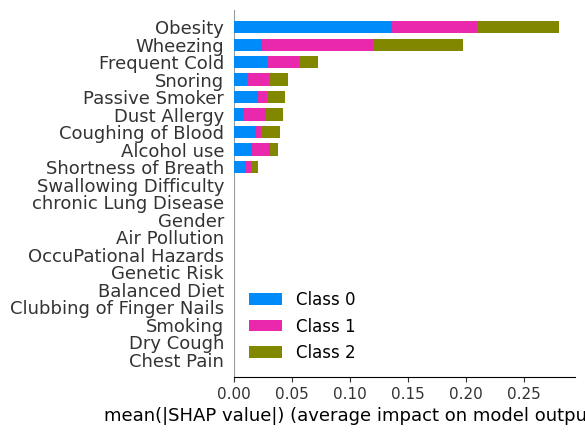

In [40]:
import shap
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
catboost_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='MultiClass', eval_metric='Accuracy', random_state=42)
catboost_model.fit(X_train_scaled, y_train, eval_set=(X_test_scaled, y_test), early_stopping_rounds=50, verbose=False)
explainer = shap.TreeExplainer(catboost_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.gcf().set_size_inches(5, 4)  
plt.show()